In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score
from itertools import combinations
import pandas as pd
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
import networkx as nx
from sklearn.metrics import silhouette_score
import seaborn as sns

In [9]:
filelocation_TET = 'NDT_all_12thDec_uncleaned.csv'
feelings = ['MetaAwareness','Presence','PhysicalEffort','MentalEffort','Boredom', 'Receptivity', 'EmotionalIntensity', 'Clarity', 'Release', 'Bliss', 'Embodiment', 'Insightfulness', 'Anxiety', 'SpiritualExperience']
header = "Week"
no_dimensions = 2
colours = {0:'red',1:'green',2:'blue',3:'orange',4:'pink',5:'yellow'}
colours_list = ['red','green','blue','orange','pink','yellow']
n_clust = 3
headers = {'Subject':0, 'Week':1, 'Session':2}
lcm = 332640
n_rep = 1
no_of_jumps = 1

In [10]:
class csv_splitter:

    def __init__(self,excel_file_name):
        self.excel_file_location = f'c:\\Users\\hugma\\diss\\{excel_file_name}'
        self.dataframes = None
    def read_excel(self):
        try:
            df_excel_file_name = pd.read_csv(self.excel_file_location)
            return df_excel_file_name
        except Exception as e:
            print(f"error reading Excel file: {e}")
    def split_by_header(self,df_excel_file_name, heading):
        if heading not in df_excel_file_name.columns:
            print(f"Error: '{heading}' not found in DataFrame columns.")
            return None
        heading_values = df_excel_file_name[heading].unique()
        split_df = {value: df_excel_file_name[df_excel_file_name[heading] == value] for value in heading_values}
        split_df_array = [[key, value] for key, value in split_df.items()]
        return split_df, split_df_array

In [11]:
class principal_component_finder:

    def __init__(self,csv_file, feelings,no_dimensions):
        self.csv_file_TET = csv_file[feelings]
        corr_matrix = self.csv_file_TET.corr()
        pca = PCA(n_components=no_dimensions)
        self.principal_components=pca.fit_transform(corr_matrix)
        self.explained_variance_ratio = pca.explained_variance_ratio_
    def PCA_TOT(self):
        df_TET_feelings_prin = self.csv_file_TET.dot(self.principal_components)
        for i in range(0,self.principal_components.shape[1]):
            y_values = []
            for j in range(0,len(feelings)):
                y_values.append(self.principal_components[j][i])
           # plt.figure()
            #plt.bar(feelings,y_values)
            #plt.title(f'principal componant {i+1}')
            #plt.xticks(rotation=45, ha='right')
        #plt.figure()
        #plt.scatter(df_TET_feelings_prin[0],df_TET_feelings_prin[1], s=0.5)
        #plt.xlabel('principal componant 1 (bored/effort)')
        #plt.ylabel('principal componant 2 (calm)')
        #plt.xlim(-6,6)
        #plt.ylim(-1,2)
        
        return self.principal_components, self.explained_variance_ratio, df_TET_feelings_prin
    def PCA_split(self,split_df_array):
        split_df_array_TET = [[split_df_array[i][0],split_df_array[i][1][feelings]] for i in range(0,len(split_df_array))]
        split_csv_TET = {split_df_array_TET[i][0]: split_df_array_TET[i][1] for i in range(0,len(split_df_array))}
        df_TET_feelings_prin_dict = {name: split_csv_TET[name].dot(self.principal_components) for name in split_csv_TET.keys()}
        #for key,value in df_TET_feelings_prin_dict.items():
           # plt.figure()
            #plt.scatter(value[0],value[1],s=0.5)
           # plt.title(key)
            #plt.xlabel('principal componant 1 (bored/effort)')
           # plt.ylabel('principal componant 2 (calm)')
            #plt.xlim(-6,6)
           # plt.ylim(-1,2)
            #plt.show()
        return df_TET_feelings_prin_dict

In [12]:
csv_splitter_instance = csv_splitter(filelocation_TET)
df_csv_file_original = csv_splitter_instance.read_excel()
split_df, split_csv_array = csv_splitter_instance.split_by_header(df_csv_file_original,header)

In [13]:
principal_component_finder_instance = principal_component_finder(df_csv_file_original,feelings,no_dimensions)
principal_components, explained_variance_ratio, df_TET_feelings_prin = principal_component_finder_instance.PCA_TOT()
df_TET_feelings_prin_dict = principal_component_finder_instance.PCA_split(split_csv_array)

C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stable)
C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stab

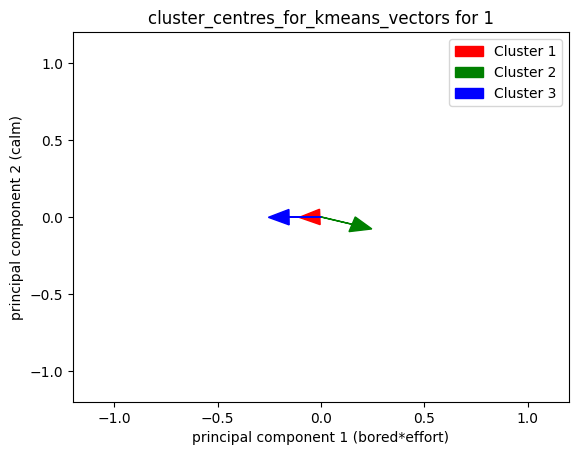

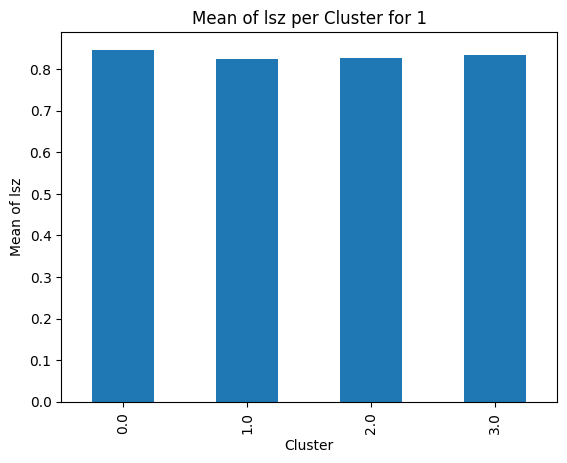

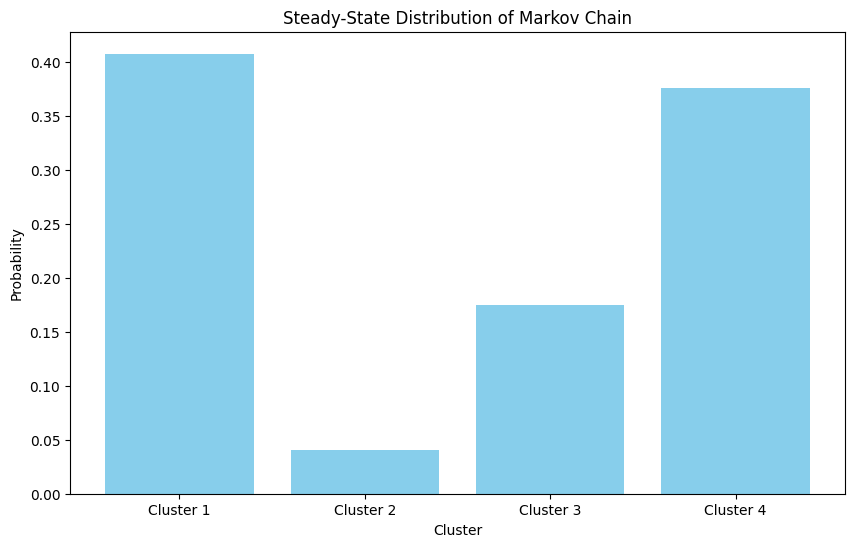

<Figure size 640x480 with 0 Axes>

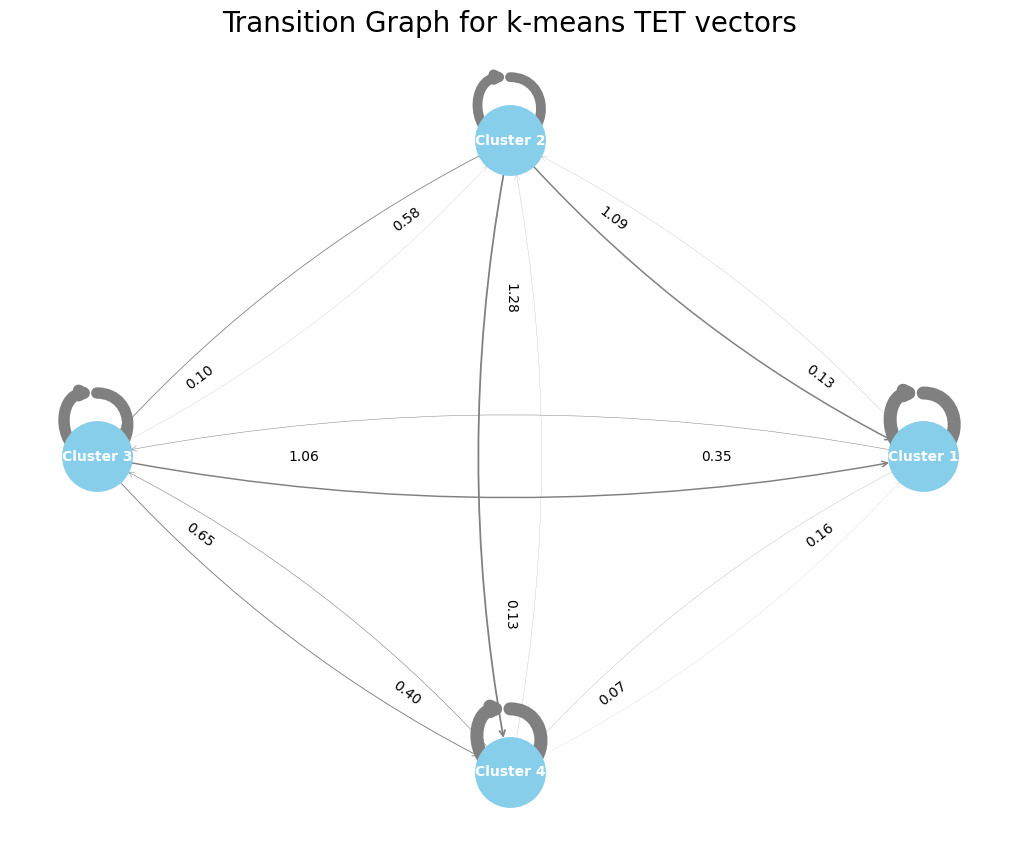

C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stable)
C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stab

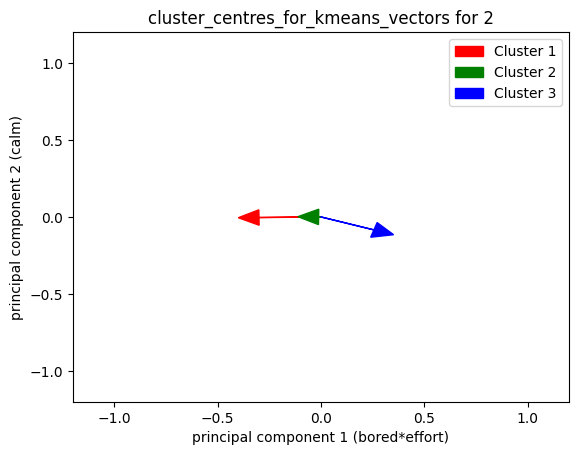

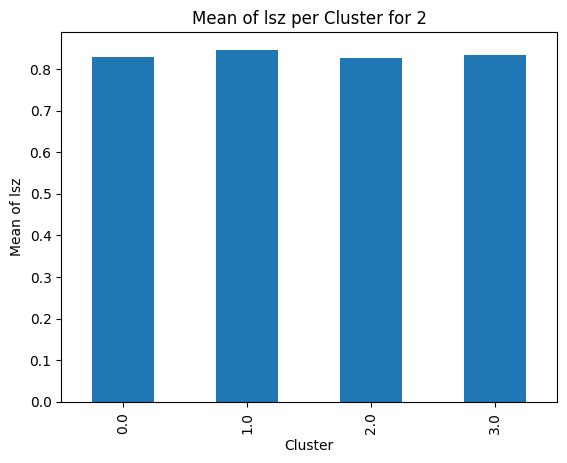

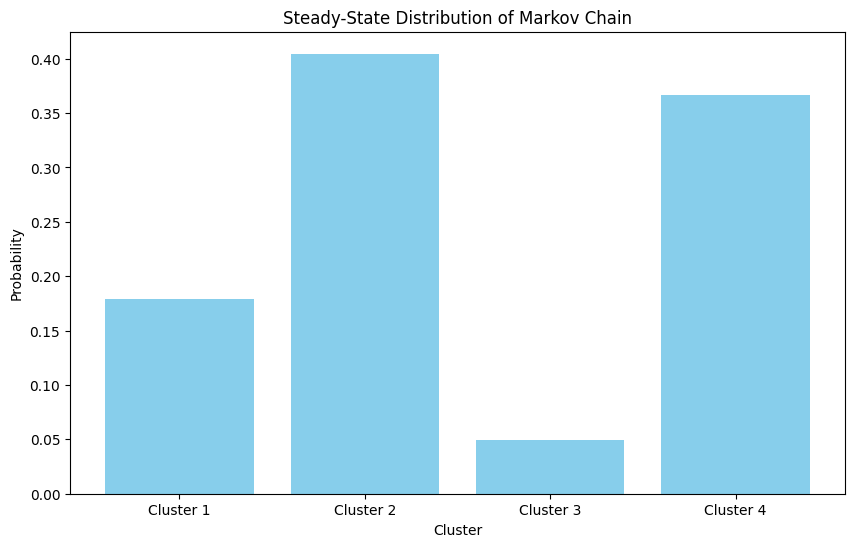

<Figure size 640x480 with 0 Axes>

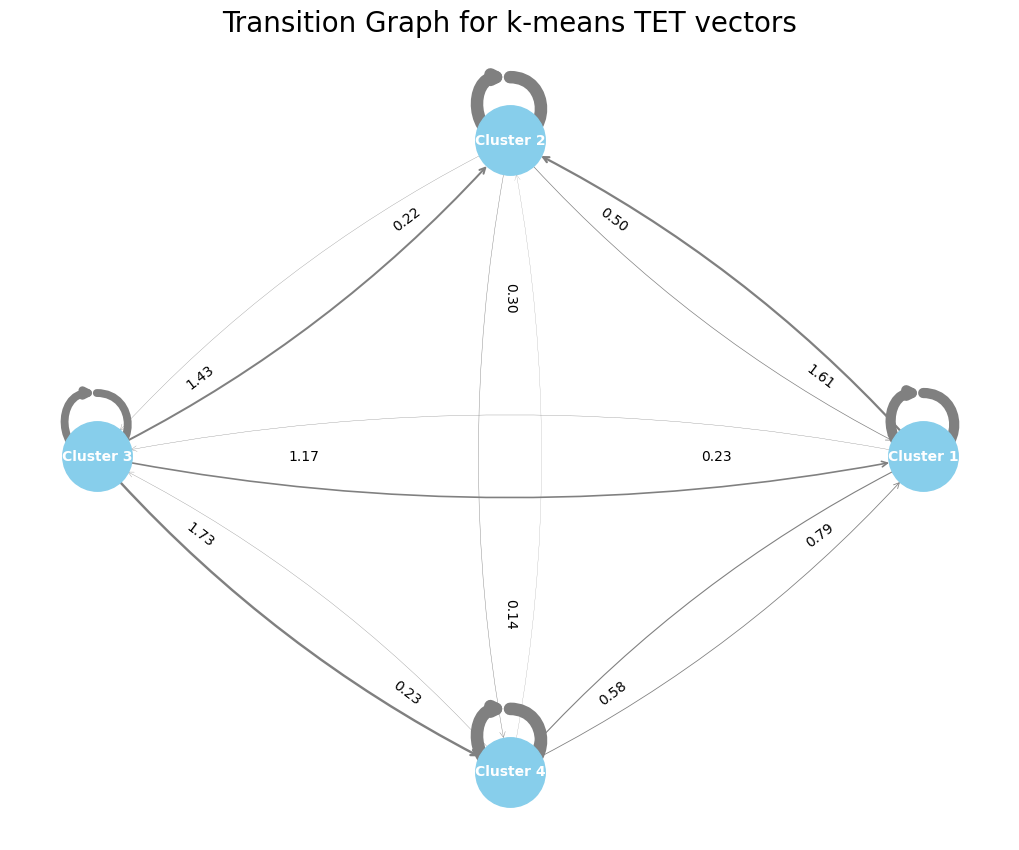

C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stable)
C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stab

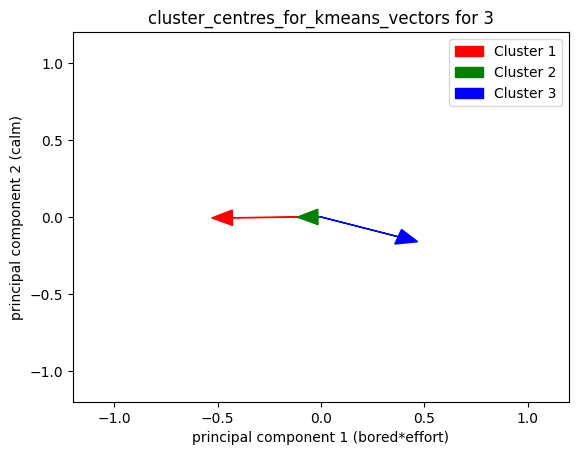

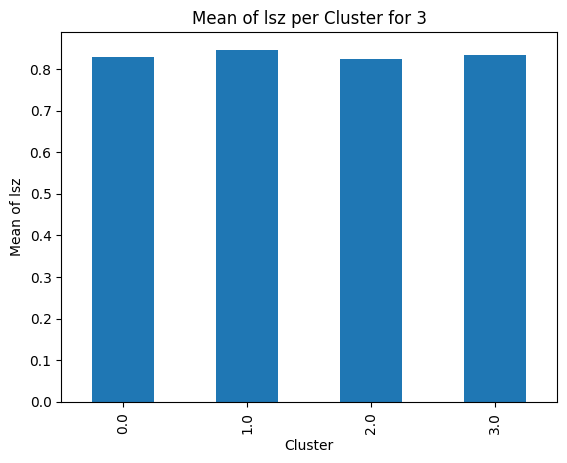

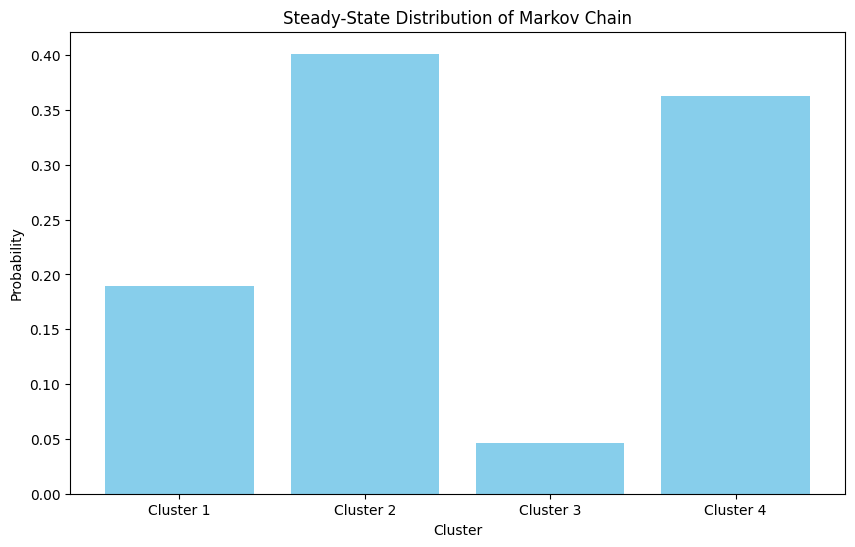

<Figure size 640x480 with 0 Axes>

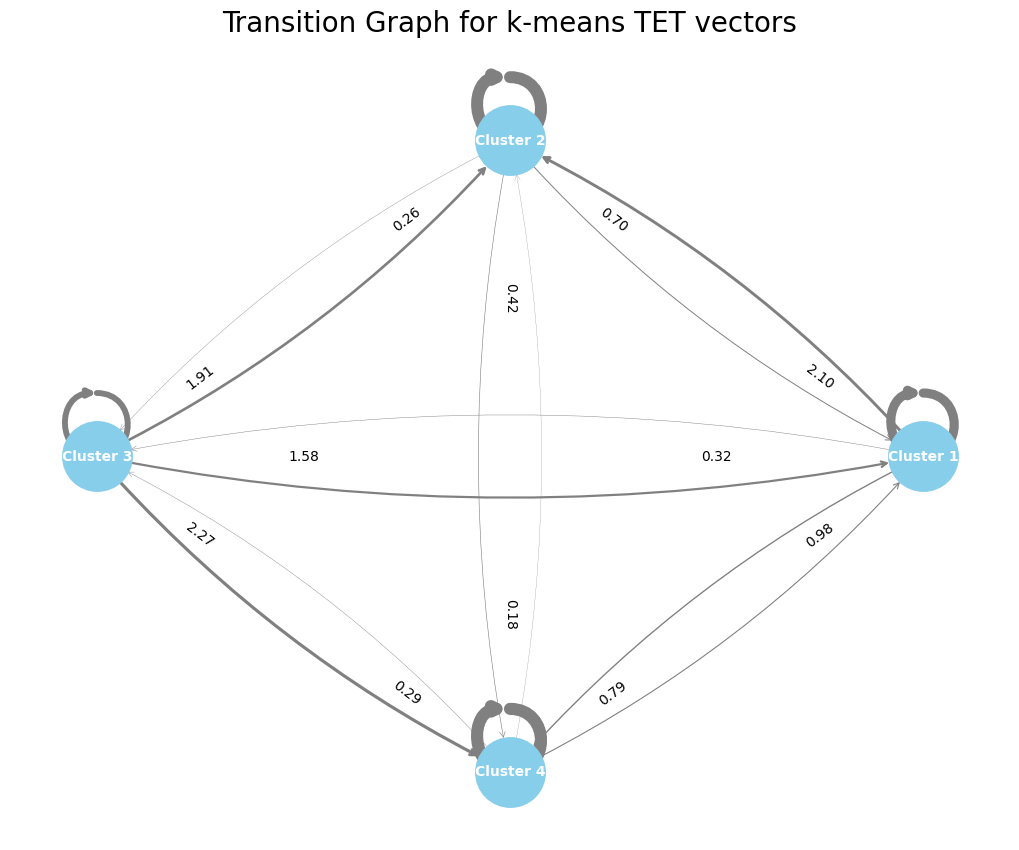

C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stable)
C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stab

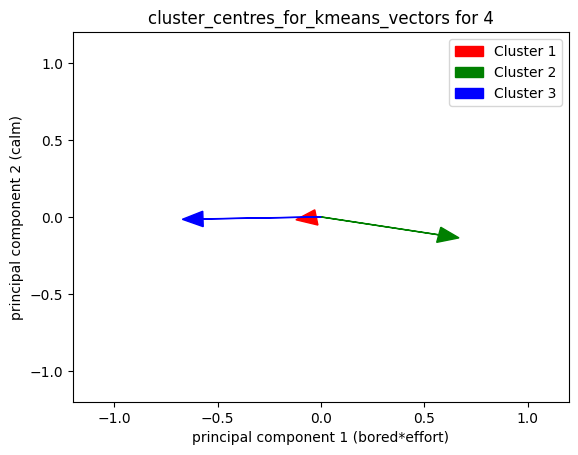

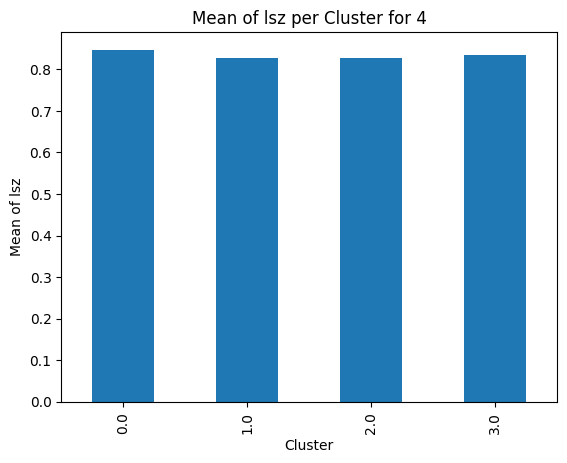

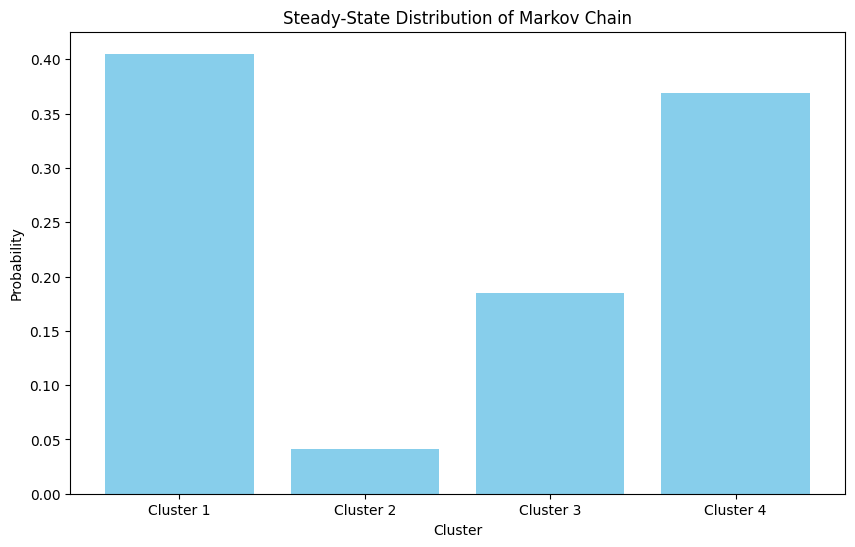

<Figure size 640x480 with 0 Axes>

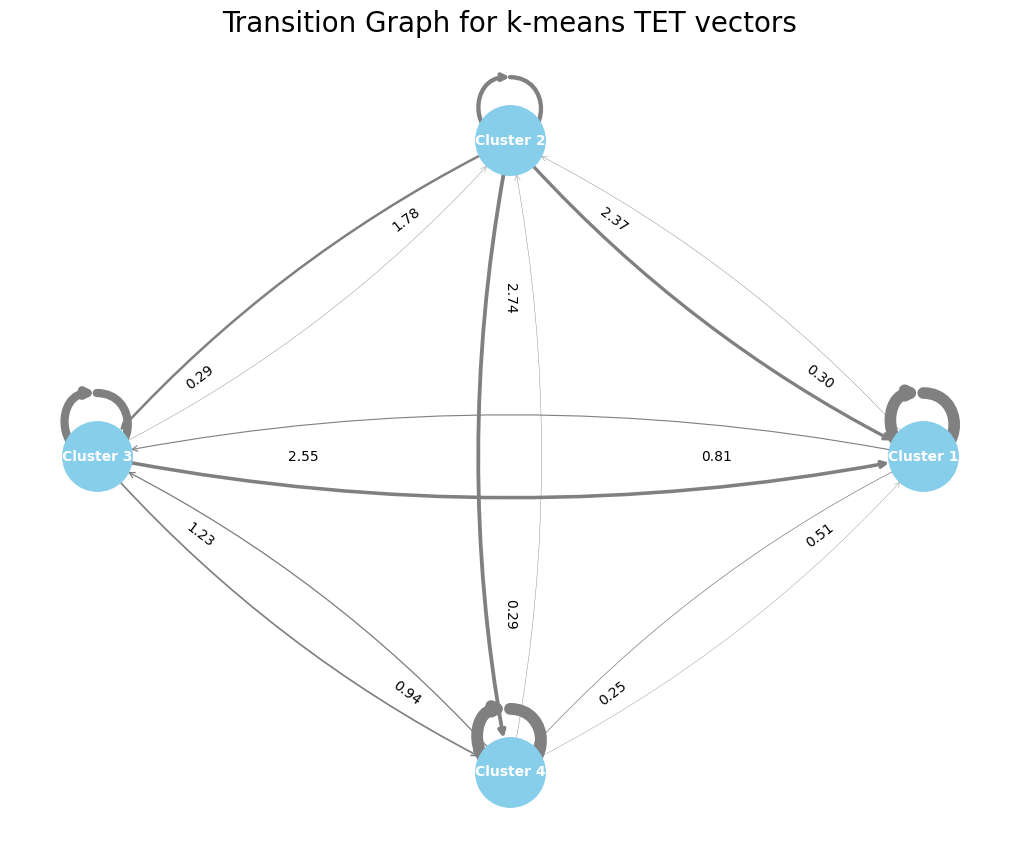

C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stable)
C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stab

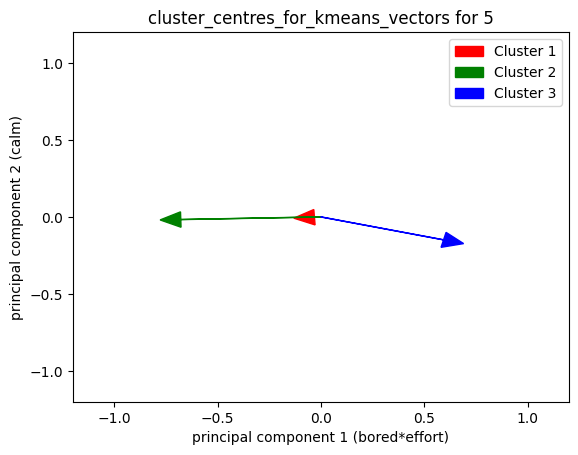

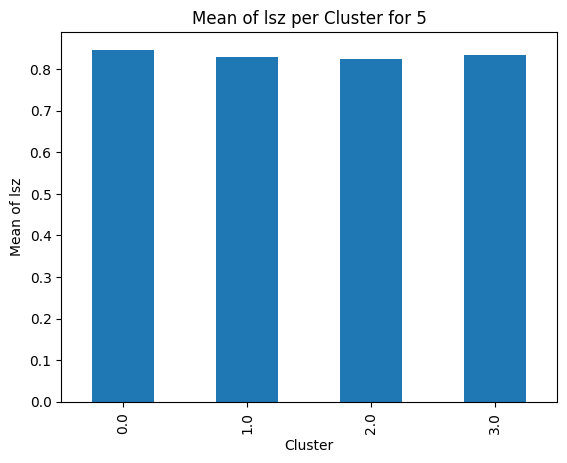

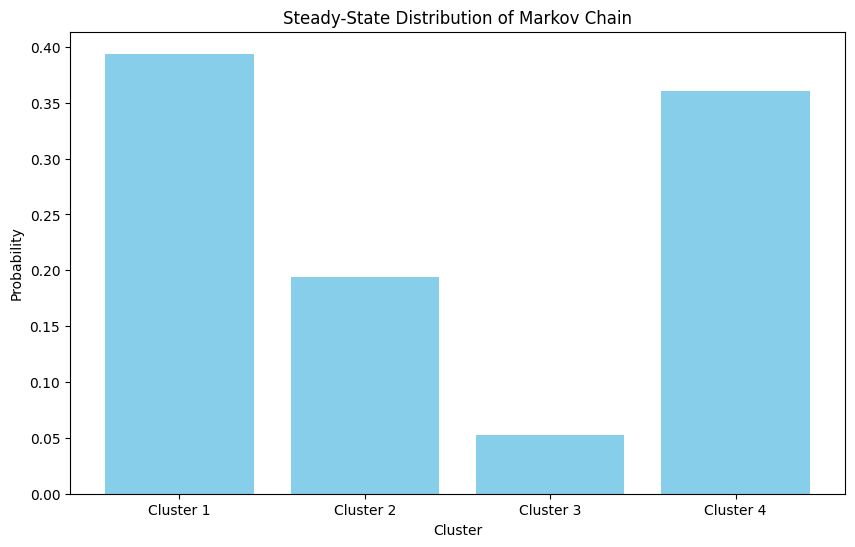

<Figure size 640x480 with 0 Axes>

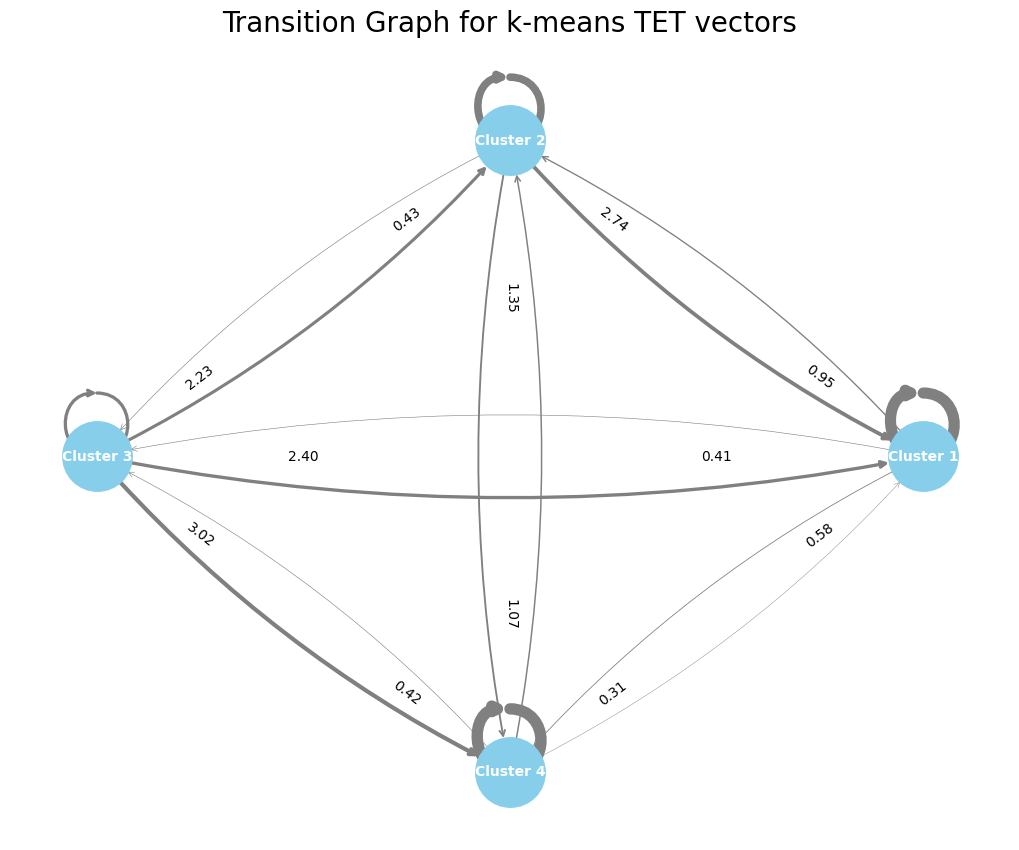

C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stable)
C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stab

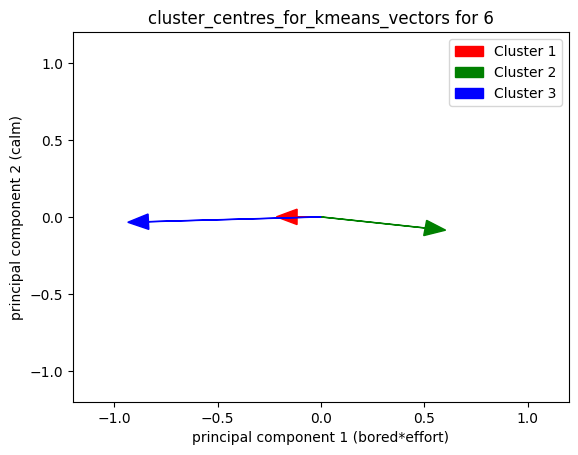

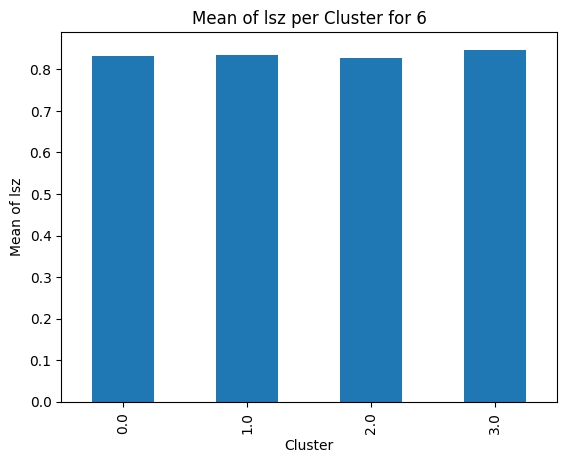

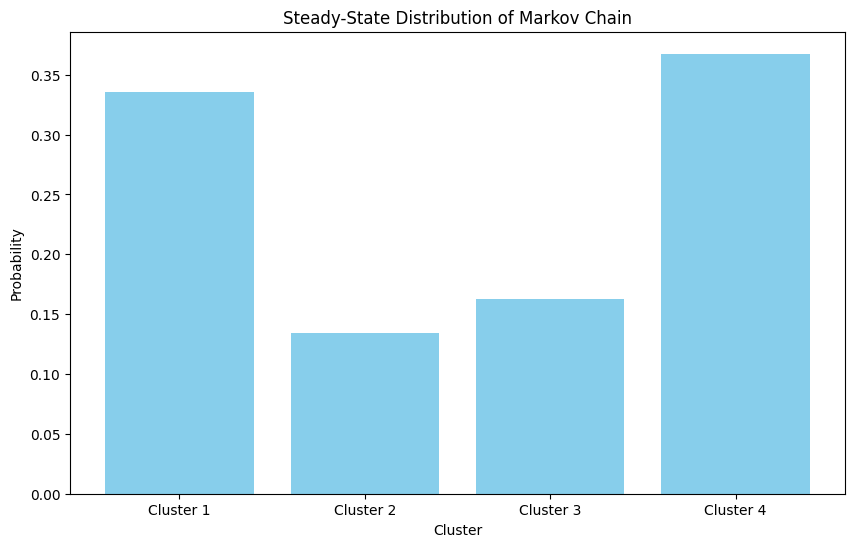

<Figure size 640x480 with 0 Axes>

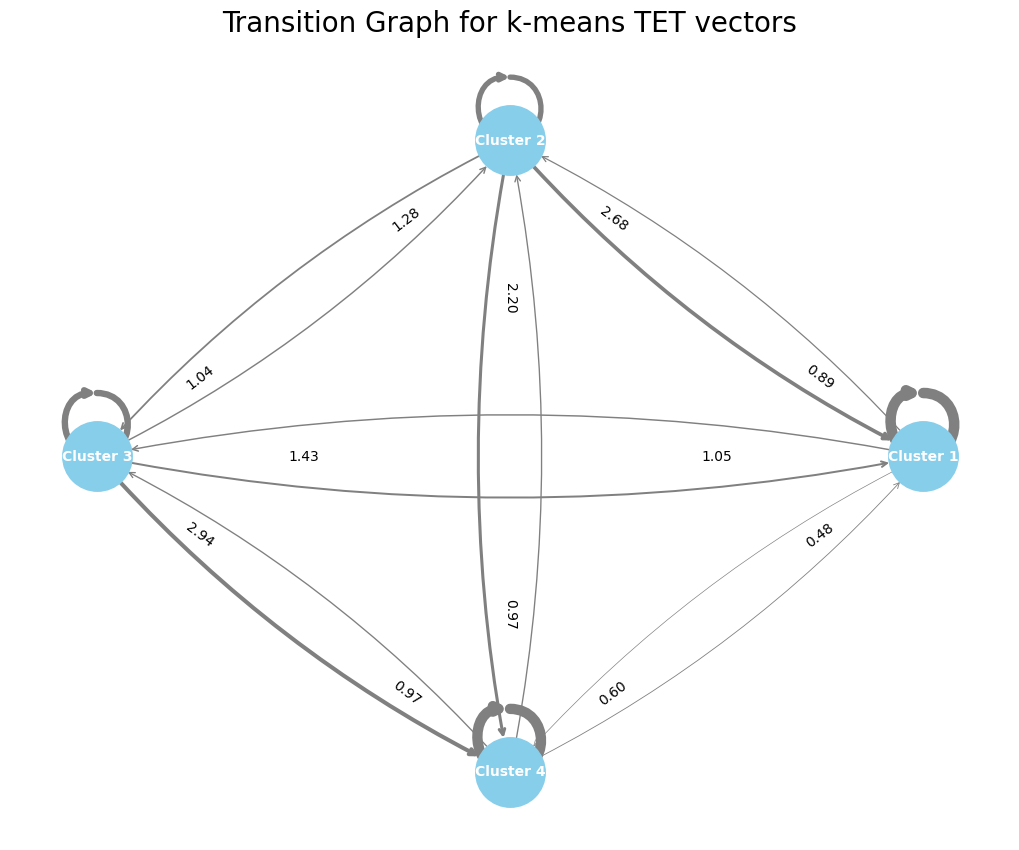

C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stable)
C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stab

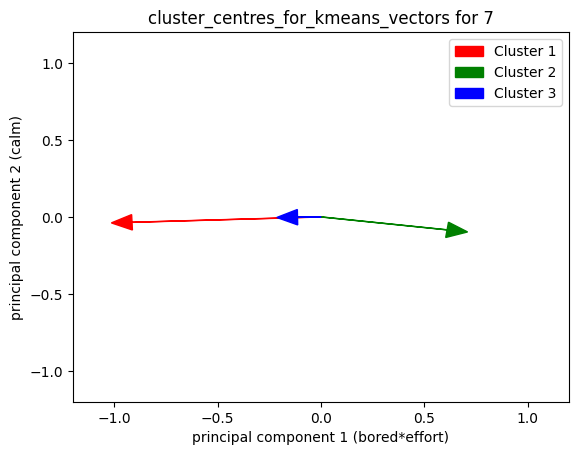

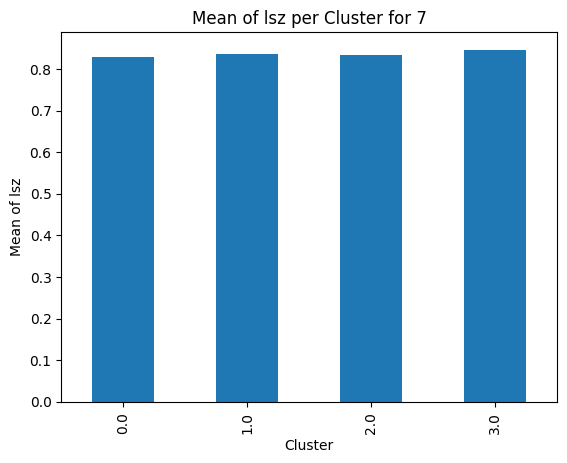

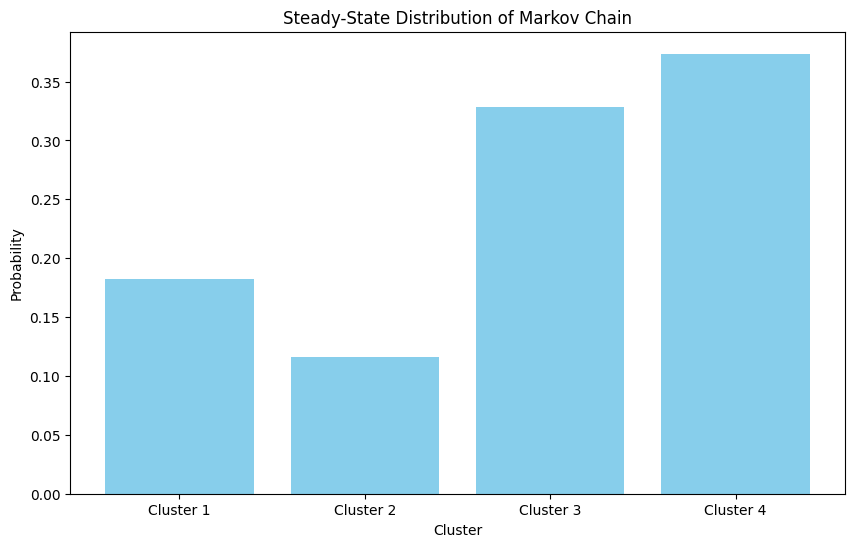

<Figure size 640x480 with 0 Axes>

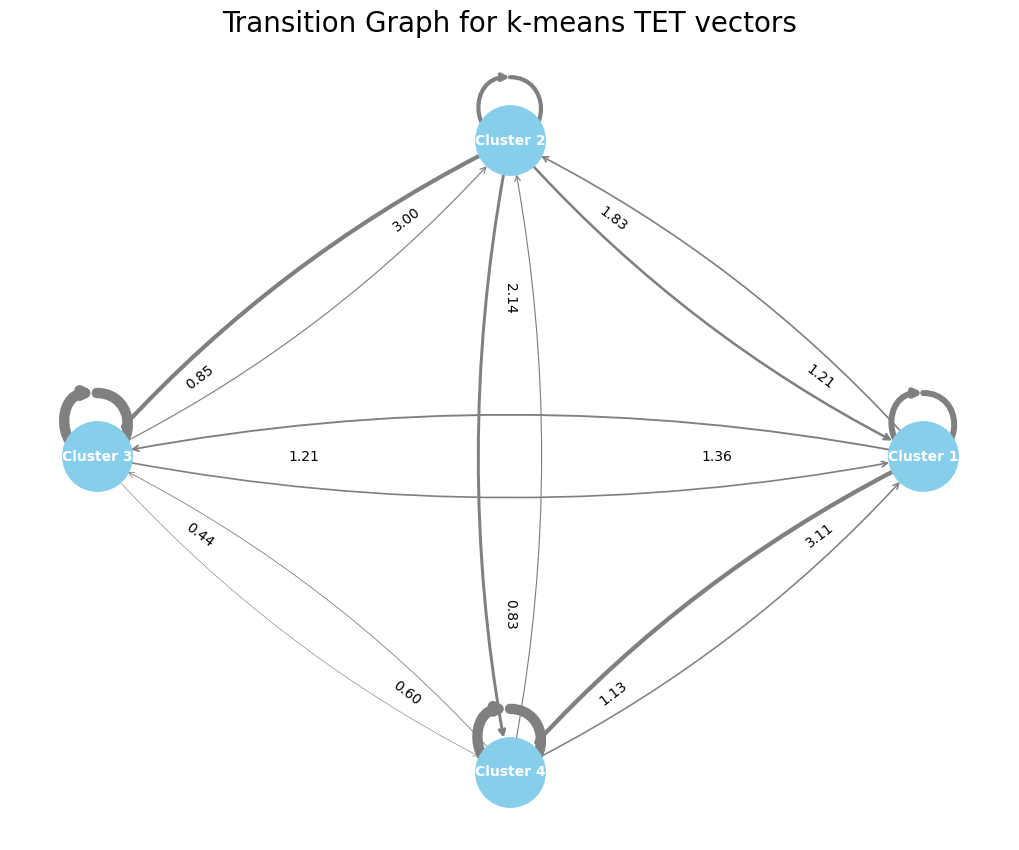

C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stable)
C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stab

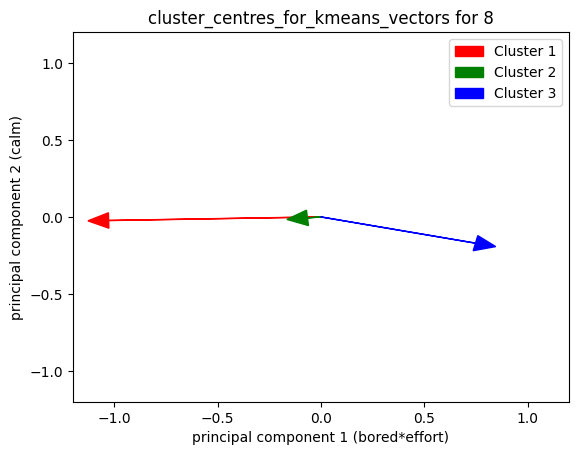

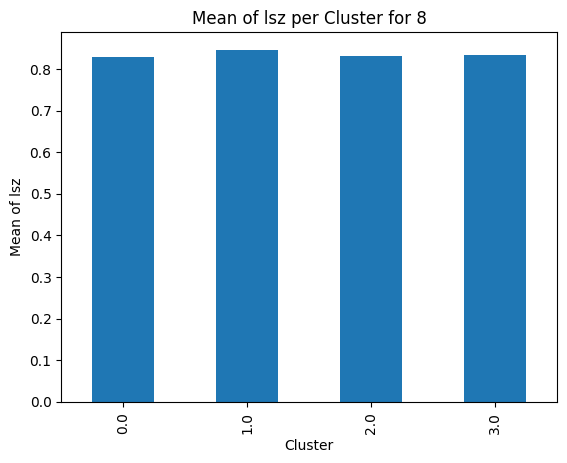

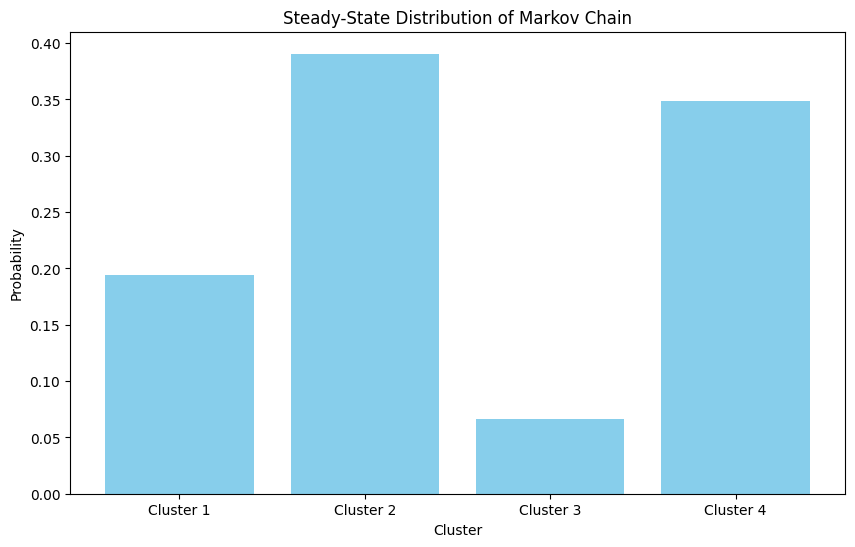

<Figure size 640x480 with 0 Axes>

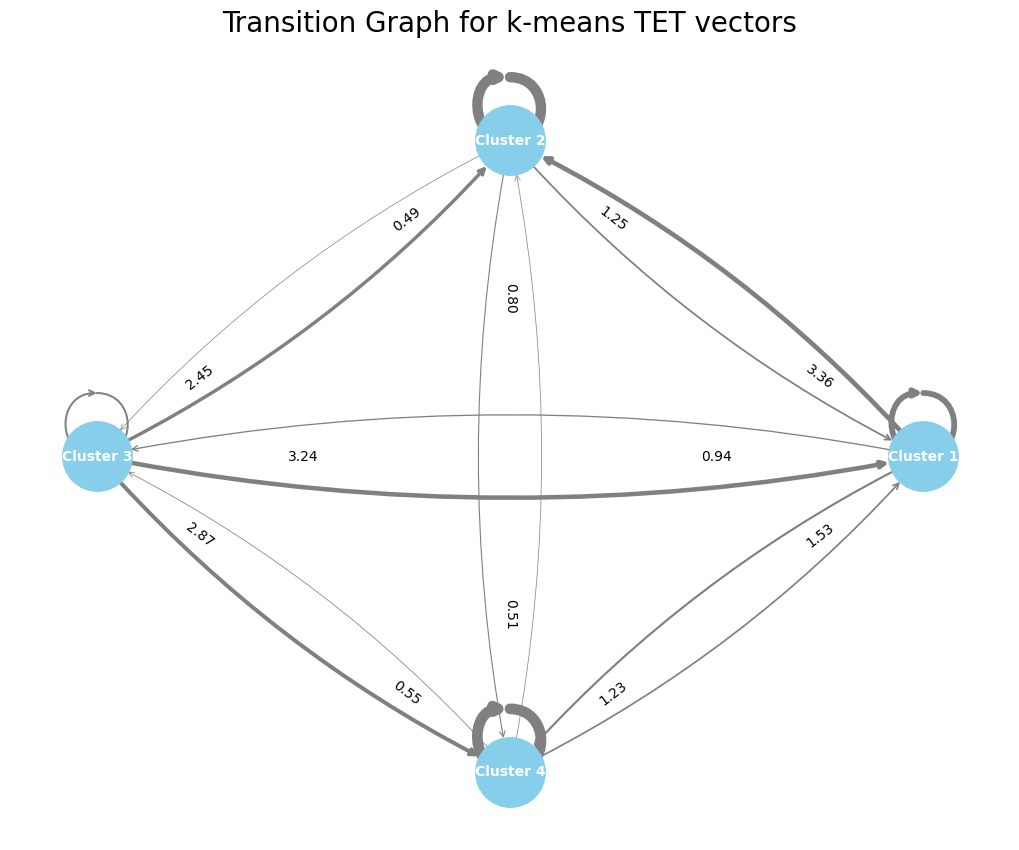

C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stable)
C:\Users\hugma\AppData\Local\Temp\ipykernel_27456\1834808673.py:80: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  differences_array.update(df_stab

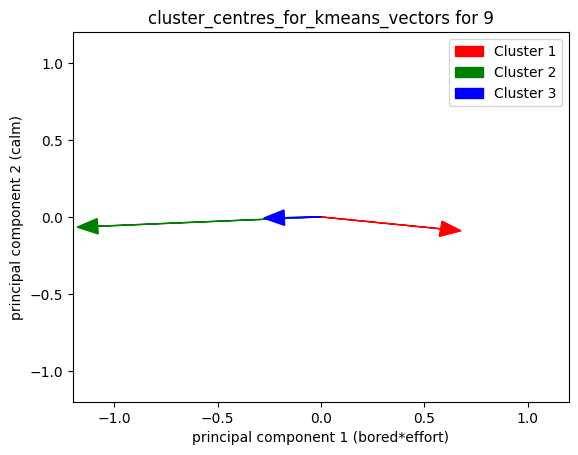

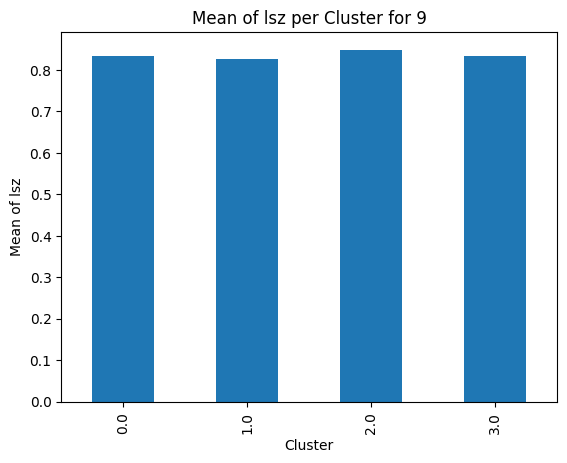

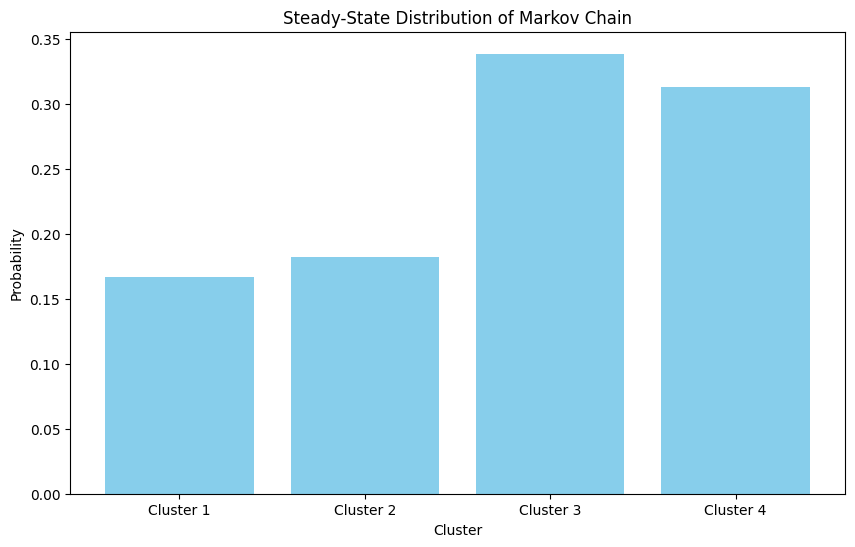

<Figure size 640x480 with 0 Axes>

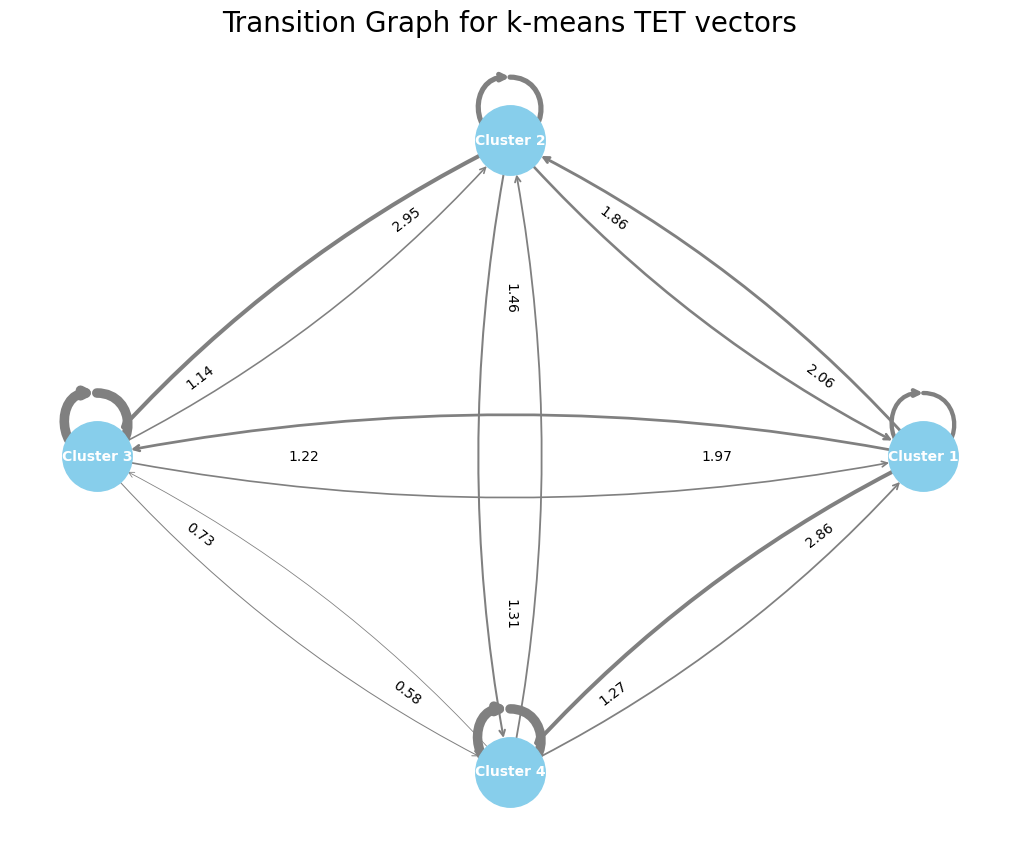

: 

In [14]:
for no_of_jumps in range(1,10):   
    split_dict_skip = {}
    for (subject, week, session), group in df_csv_file_original.groupby(['Subject', 'Week', 'Session']):
        split_dict_skip[(subject, week, session)] = group.iloc[::no_of_jumps].copy()
    df_csv_file = pd.concat([df for df in split_dict_skip.values()])
    for feeling in feelings: 
    
        df_csv_file[f'{feeling}_diff'] = -df_csv_file[feeling].diff(-1)
    split_dict = {}
    for (subject, week, session), group in df_csv_file.groupby(['Subject', 'Week', 'Session']):
        split_dict[(subject, week, session)] = group.copy()
    differences_array = pd.concat([df[:-1] for df in split_dict.values()])
    numbers = []
    for i in range(differences_array.shape[0]):
        numbers.append(i)
    
    differences_array_MI = differences_array.copy()
    differences_array_MI['number'] = numbers
    wcss_best = 10000000
    labels_fin = []
    cluster_centres_fin = []
    for i in range(0,1000):
        kmeans = KMeans(3)
        kmeans.fit(differences_array.iloc[:,-14:])
        labels = kmeans.labels_
        cluster_centres = kmeans.cluster_centers_
        wcss = kmeans.inertia_
        if wcss< wcss_best:
            wcss_best = wcss
            labels_fin = labels
            cluster_centres_fin = cluster_centres
    differences_array_MI['labels unnormalised vectors'] = labels_fin
    point_colours = []
    for i in labels_fin:
        point_colours.append(colours[i])
    magnitudes = np.linalg.norm(differences_array.iloc[:,-14:], axis=1)

    # Replace any zeros with ones to avoid division by zero
    magnitudes[magnitudes == 0] = 1

    # Normalize each row to have the same magnitude
    normalized_df = differences_array.iloc[:,-14:].div(magnitudes, axis=0)
    cluster_centres_prin = np.transpose(cluster_centres_fin.dot(principal_components),(1,0))
    for i in range(cluster_centres_prin.shape[1]):
        plt.arrow(0, 0, cluster_centres_prin[0,i], cluster_centres_prin[1,i],
                head_width=0.1, head_length=0.1, fc=colours_list[i], ec=colours_list[i])

    # Set the labels for the axes
    plt.xlabel("principal component 1 (bored*effort)")
    plt.ylabel("principal component 2 (calm)")

    # Create the legend
    legend = ['Cluster {}'.format(i+1) for i in range(cluster_centres_prin.shape[1])]
    plt.legend(legend)
    plt.title(f"cluster_centres_for_kmeans_vectors for {no_of_jumps}")
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    plt.savefig("c:/Users/hugma/diss/data/cluster_centres_for_kmeans_vectors")
    magnitudes = []
    for i in range (len(cluster_centres_fin)):
        magnitudes.append(np.linalg.norm(cluster_centres_fin[i]))
    stable_cluster = np.argmin(magnitudes)
    differences_array['clust'] = labels_fin

    df_stable = differences_array[differences_array['clust'] == stable_cluster].copy() 
    wcss_best = float('inf') 
    for i in range(1000):
        kmeans = KMeans(2)
        kmeans.fit(df_stable[feelings])
        labels_test = kmeans.labels_
        cluster_centres = kmeans.cluster_centers_
        wcss = kmeans.inertia_
        if wcss < wcss_best:
            wcss_best = wcss
            labels_fin_stable = labels_test
            cluster_centres_fin_stable = cluster_centres
    df_stable = df_stable.drop('clust', axis=1)
    df_stable['clust'] = [stable_cluster if label == 0 else 3 for label in labels_fin_stable]

    differences_array.update(df_stable)
    downsampled_groups = []
    for (subject, week, session), group in df_csv_file_original.groupby(['Subject', 'Week', 'Session']):
        downsampled = group.iloc[::no_of_jumps].copy()
        downsampled = downsampled[:-1]
        downsampled['Original_Index'] = downsampled.index
        downsampled_groups.append(downsampled)

    # Concatenate downsampled groups into a DataFrame
    df_downsampled = pd.concat(downsampled_groups)
    df_downsampled['Cluster_Label'] = differences_array['clust']
    df_csv_file_original['Cluster_Label'] = np.nan
    for _, row in df_downsampled.iterrows():
        original_index = row['Original_Index']
        label = row['Cluster_Label']
        # Find the group of the original index
        group_info = df_csv_file_original.loc[original_index, ['Subject', 'Week', 'Session']]
        group_mask = (df_csv_file_original['Subject'] == group_info['Subject']) & \
                    (df_csv_file_original['Week'] == group_info['Week']) & \
                    (df_csv_file_original['Session'] == group_info['Session'])
        group_indices = df_csv_file_original[group_mask].index
        # Find the position of the original index within its group
        pos_in_group = list(group_indices).index(original_index)
        # Calculate the start and end indices to assign labels within the group based on no_of_jumps
        start_idx = pos_in_group - (pos_in_group % no_of_jumps)
        end_idx = min(start_idx + no_of_jumps, len(group_indices))
        for i in range(start_idx, end_idx):
            df_csv_file_original.at[group_indices[i], 'Cluster_Label'] = label
    mean_lsz = df_csv_file_original['global_lzc'].mean()
    mean_lsz_per_clust = df_csv_file_original.groupby('Cluster_Label')['global_lzc'].mean()

    # Now, plot the mean values as a bar graph
    plt.figure()
    mean_lsz_per_clust.plot(kind='bar')
    
    plt.xlabel('Cluster')
    plt.ylabel('Mean of lsz')
    plt.title(f'Mean of lsz per Cluster for {no_of_jumps}')
    plt.show()
    
    transitions = []
    for i in range(len(differences_array) - 1):
        transitions.append((differences_array.iloc[i]['clust'], differences_array.iloc[i+1]['clust']))
    num_clusters = max(differences_array['clust']) + 1 

    transition_matrix = np.zeros((num_clusters, num_clusters))

    for (from_cluster, to_cluster) in transitions:
        transition_matrix[from_cluster, to_cluster] += 1

    transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)
    differences_array_transitions = differences_array_MI[:-1].copy()

    differences_array_transitions['transitions'] = transitions
    differences_array_transitions.to_csv('c:/Users/hugma/diss/data/differences_array_transitions.csv',index=False)
    feelings_diffs = ['MetaAwareness_diff', 'Presence_diff', 'PhysicalEffort_diff',
       'MentalEffort_diff', 'Boredom_diff', 'Receptivity_diff',
       'EmotionalIntensity_diff', 'Clarity_diff', 'Release_diff', 'Bliss_diff',
       'Embodiment_diff', 'Insightfulness_diff', 'Anxiety_diff',
       'SpiritualExperience_diff']
    transitions_dict = {}
    transitions_next_dict = {}
    array_store = []
    for heading, group in differences_array_transitions.groupby('transitions'):
        transitions_dict[heading] = group.copy()
    for key, values in transitions_dict.items():
        frames = []  # List to store DataFrames for each iteration
        for index, value in values.iterrows():
            row_data = differences_array_MI[differences_array_MI['number'] == value['number']+1][feelings_diffs]
            frames.append(row_data)
        transitions_next_dict[key] = pd.concat(frames, axis=0)
    n = transition_matrix.shape[0]
    A = transition_matrix.T - np.eye(n)
    A[-1] = np.ones(n)
    b = np.zeros(n)
    b[-1] = 1
    pi = np.linalg.solve(A, b)
    pi
    plt.figure(figsize=(10, 6))
    clusters = [f'Cluster {i+1}' for i in range(n)]
    plt.bar(clusters, pi, color='skyblue')
    plt.xlabel('Cluster')
    plt.ylabel('Probability')
    plt.title('Steady-State Distribution of Markov Chain')
    plt.show()
    plt.savefig("C:/Users/hugma/diss/data/steady-state distrbution for markov chain for kmeans clustering TET vectors")
    G = nx.DiGraph()

    # Add nodes and edges with weights
    for i in range(len(transition_matrix)):
        for j in range(len(transition_matrix[i])):
            prob = transition_matrix[i][j]
            if prob > 0:  # Only add an edge if the probability is non-zero
                # The edge width will be proportional to the probability
                G.add_edge(f'Cluster {i+1}', f'Cluster {j+1}', weight=prob*10)  # Multiply by a factor for better visualization

    # Draw the graph
    plt.figure(figsize=(10, 8))
    pos = nx.circular_layout(G)  # Position nodes in a circle

    # Extract weights and apply as widths
    edge_weights = nx.get_edge_attributes(G, 'weight')
    edge_widths = [edge_weights[edge] for edge in G.edges()]
    edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}

    nx.draw(G, pos, node_color='skyblue', node_size=2500, width=edge_widths, arrowstyle='->', connectionstyle='arc3,rad=0.1', edge_color='grey')
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='white')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.75, font_size=10)
    
    plt.axis('off')

    plt.title('Transition Graph for k-means TET vectors', size=20)
    plt.savefig("C:/Users/hugma/diss/data/transition graph for markov chain for kmeans clustering TET vectors")
    plt.show()
